In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

In [2]:
def f(x):
    return np.sqrt(x) - 2 * np.cos(x)

def main_fun(x:float, c:float):
    return c * np.exp(-x) + x**2 * np.sin(x)

a, b = 1, 3
p, q = 3, 8

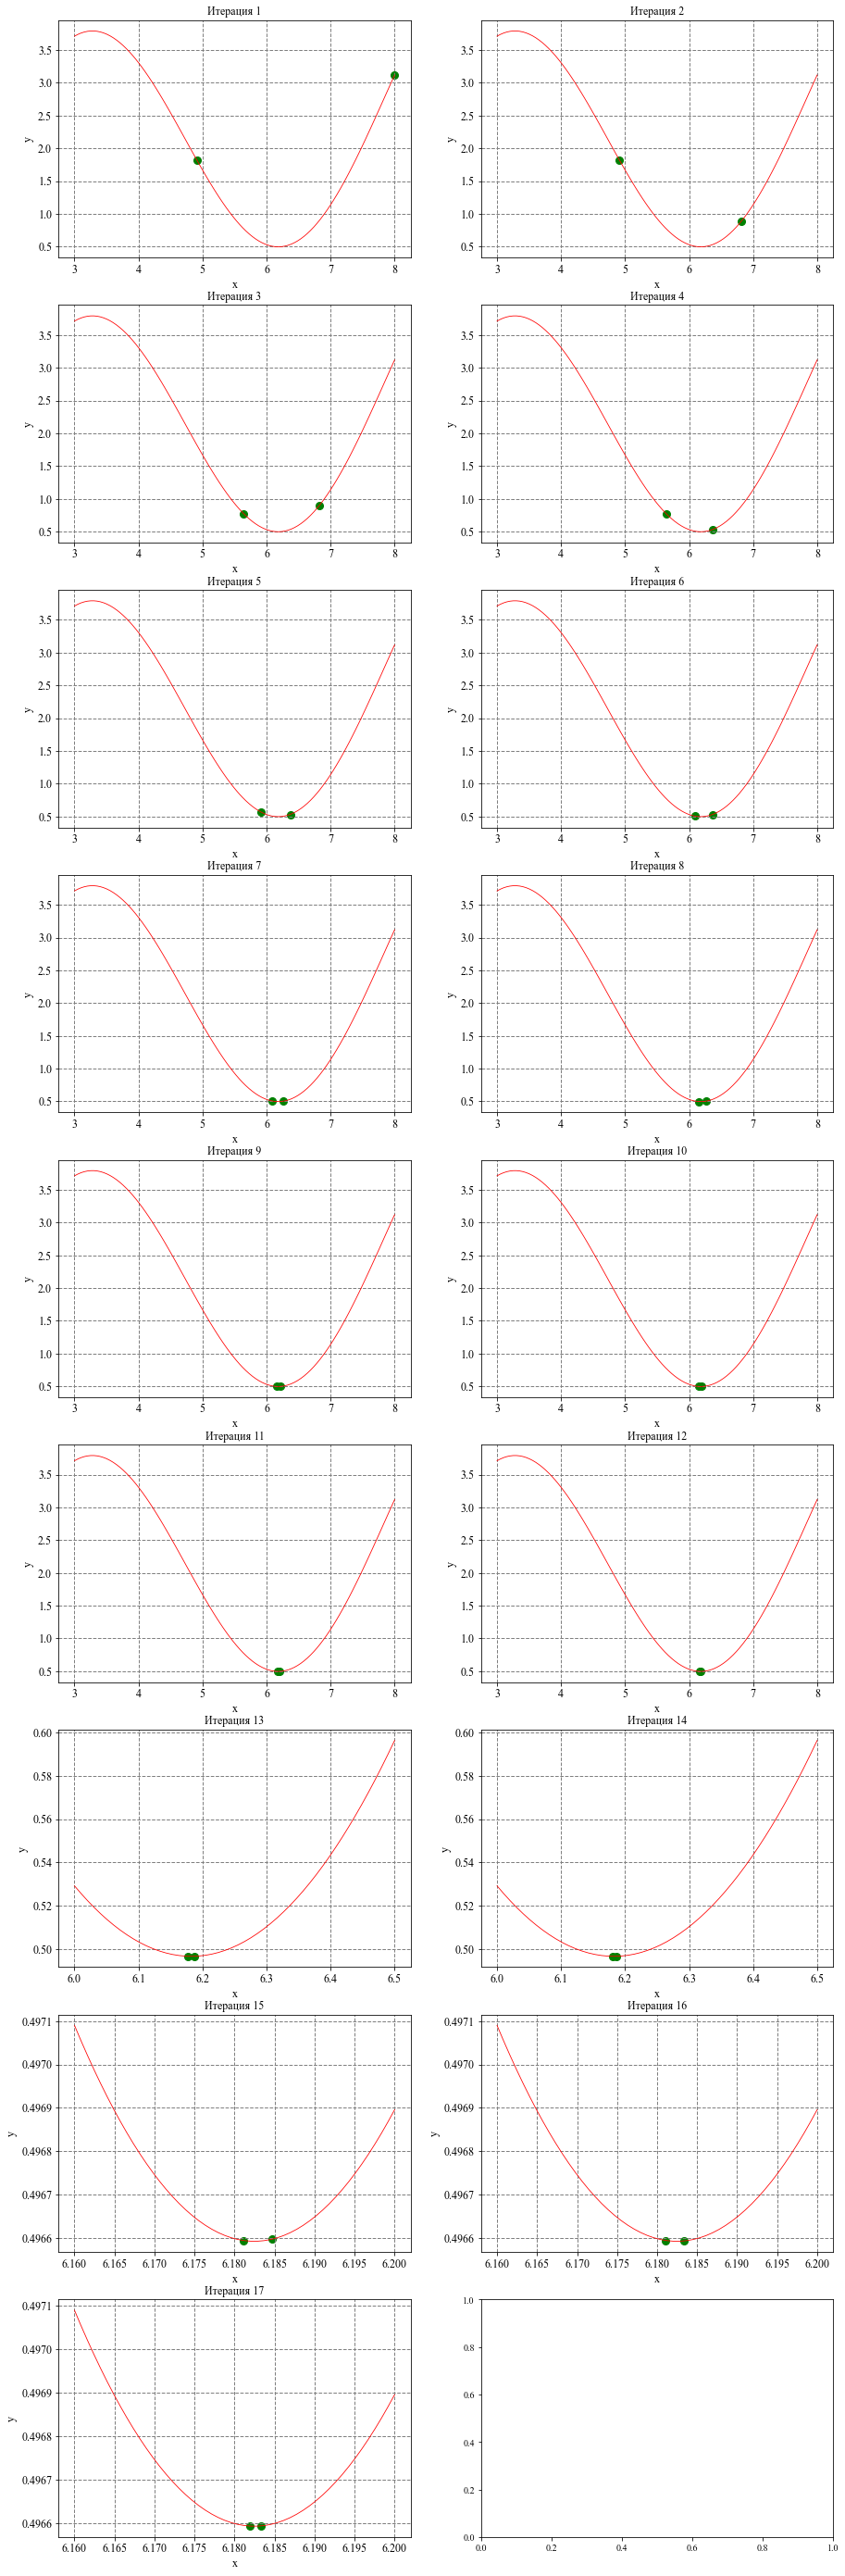

In [11]:
mpl.rcParams['font.family'] = 'fantasy'
mpl.rcParams['font.fantasy'] = 'Times New Roman'

x = np.linspace(p, q, 100)
y = np.array([f(i) for i in x])
k = 1

fig, ax = plt.subplots(9, 2, figsize=(15,50))

file = open("points.txt", "r")
for i in range(9):
    for j in range(2):
        points = file.readline().strip().split()
        if i > 5 and i < 7:
            x = np.linspace(6, 6.5, 50)
            y = np.array([f(i) for i in x])
        elif i >= 7:
            x = np.linspace(6.16, 6.2, 50)
            y = np.array([f(i) for i in x])

        #Основные построения
        ax[i, j].plot(x, y, color='red', linewidth=0.8)
        ax[i, j].scatter(float(points[0]), f(float(points[0])), s=8**2, marker = 'o',color='green')
        ax[i, j].scatter(float(points[1]), f(float(points[1])), s=8**2, marker = 'o', color='green')

        #Размер шрифтов делений
        ax[i, j].tick_params(axis='x', labelsize=12)
        ax[i, j].tick_params(axis='y', labelsize=12)

        #yticks = ax[i, j].get_yticks()
        #ax[i, j].set_yticklabels(yticks, rotation=50)

        #Размер шрифтов на осях и титула
        ax[i, j].set_xlabel("x", size=12)
        ax[i, j].set_ylabel("y", size=12)
        ax[i, j].set_title(f"Итерация {k}", size=12)
        ax[i, j].grid(color='gray', linestyle='--', linewidth=1)

        if k == 17: break
        k += 1
file.close()
plt.savefig("golden_meethod.png")

In [12]:
from scipy.optimize import minimize
x_min = 6.1826
print(minimize(f, 8).x[0])
print(x_min)
print(minimize(f, 8).x[0] - x_min)

6.182470464076153
6.1826
-0.00012953592384690182


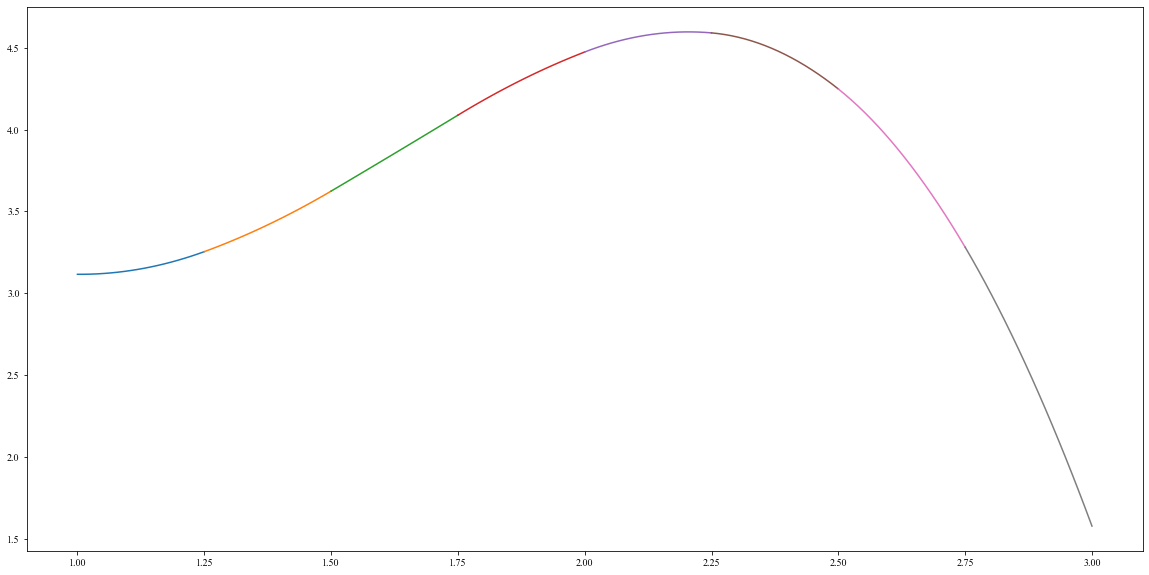

In [28]:
def L(X, Y, x_0):    
    length = len(X)
    sum = 0
    for i in range(0, length):    
        
        q = 1
        for j in range(0, length):
            if i != j:
                q *= (x_0 - X[j]) / (X[i] - X[j])
                
        sum += Y[i] * q #Интерполяционный полином Лагранжа
    
    return sum

fig, ax = plt.subplots(figsize=(20, 10))
gl_x = np.linspace(1, 3, 17)
for i in range(1, 9):
    otr = gl_x[(i-1)*2:2*i+1]
    y_temp = np.array([main_fun(i, x_min) for i in otr])
    x_1_temp = np.linspace(min(otr), max(otr), 20)
    plt.plot(x_1_temp, np.array([L(otr, y_temp, x0) for x0 in x_1_temp]))

#x_temp = np.linspace(1, 3, 3)
#y_temp = np.array([main_fun(i, x_min) for i in x_temp])

plt.show()

In [29]:
x_1 = np.linspace(a, b, 50)
y_1 = np.array([main_fun(i, x_min) for i in x_1])

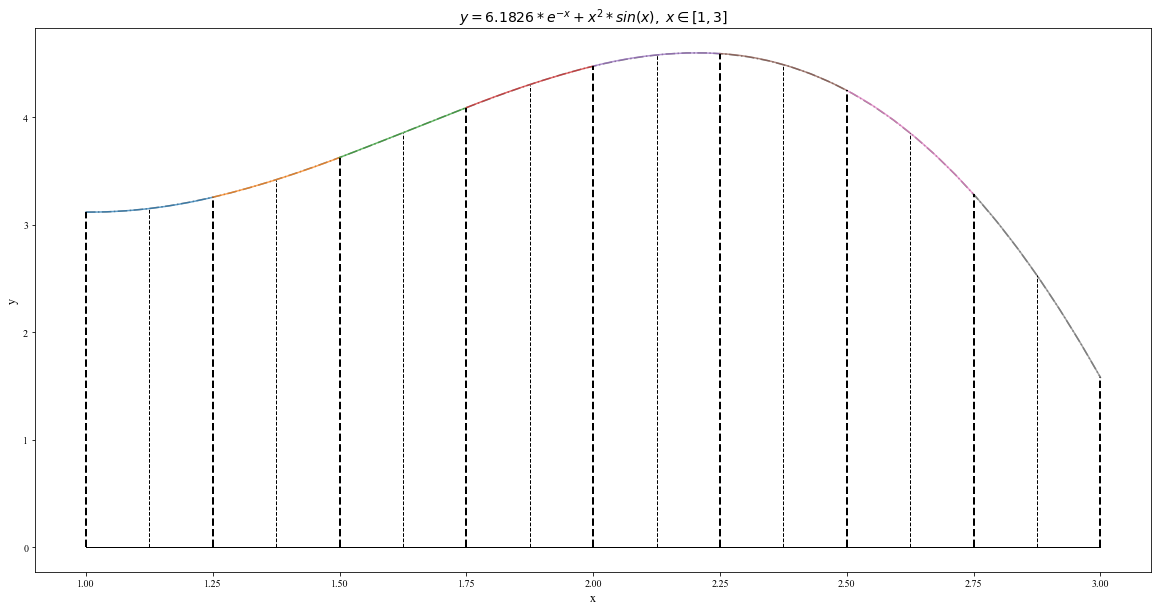

In [33]:
fig, ax = plt.subplots(figsize=(20, 10))


ax.plot(x_1, y_1, color = 'black', linestyle = '-.', alpha = 0.5)
a_y = np.linspace(0, main_fun(a, x_min), 20)
a_x = np.array([a for i in range(len(a_y))])
b_y = np.linspace(0, main_fun(b, x_min), 20)
b_x = np.array([b for i in range(len(b_y))])
iter=1
#Приближение L2(x), то есть параболами
for i in range(1, 9):
    otr = gl_x[(i-1)*2:2*i+1]
    y_temp = np.array([main_fun(i, x_min) for i in otr])
    x_1_temp = np.linspace(min(otr), max(otr), 20)
    plt.plot(x_1_temp, np.array([L(otr, y_temp, x0) for x0 in x_1_temp]), alpha = 0.7)
for i in gl_x:
    n_y = np.linspace(0, main_fun(i, x_min), 20)
    n_x = np.array([i for _ in range(len(n_y))])
    ax.plot(n_x, n_y, linestyle = '--', color = 'black', linewidth = 1 + iter%2)
    iter += 1

ax.plot(np.linspace(a, b, 50), np.array([0 for i in range(50)]), color='black', linewidth = 1)

ax.set_title(r'$y = {6.1826}*e^{-x} + x^{2}*sin(x),$ $x\in[1, 3]$', fontsize = 14)
ax.set_xlabel('x', size=12)
ax.set_ylabel('y', size=12)
plt.show()